In [84]:
options(dplyr.summarise.inform = FALSE)
library(tidyverse)
library(data.table)
library(survival)
library(gridExtra)

In [85]:
source(paste0(dirname(getwd()),'/map.r'))
source(paste0(dirname(getwd()),'/stats.r'))

#### 0 - Run analyses

In [87]:
go <- readRDS(paste0(SHARE_DIR, "ready_ex.Rds"))

In [88]:
df <- go$data_ready
features <- go$features

#### 1 - Go for a run

- Survival

In [8]:
results <- data.frame()
for( i in features){
    results <- rbind(results, 
                     get_stats2( y = "Surv(Y_os_days, Y_os_event)", 
                                 x = i, 
                                 covariate = " + clin_primaryTumorLocation2 + clin_age + clin_sex", 
                                 data = "df", 
                                 model = "coxph"))
}

Warning message in pchisq(test_stat, df):
“NaNs produced”
Warning message in pchisq(test_stat, df):
“NaNs produced”
Warning message in pchisq(test_stat, df):
“NaNs produced”
Warning message in pchisq(test_stat, df):
“NaNs produced”
Warning message in pchisq(test_stat, df):
“NaNs produced”
Warning message in pchisq(test_stat, df):
“NaNs produced”
Warning message in pchisq(test_stat, df):
“NaNs produced”
Warning message in pchisq(test_stat, df):
“NaNs produced”


In [16]:
results <- results |> mutate(pval_by = p.adjust(pval, method = "BY")) 

- Linear model with proliferation

In [ ]:
lms <- data.frame()
for( i in features){
  lms <- rbind(lms, 
                   get_stats2( y = "rna_geneset_gene_set_prolif", 
                   x = i, 
                   covariate = " + clin_primaryTumorLocation2 + clin_age + clin_sex", 
                   data = "df", 
                   model = "lm"))
}

In [60]:
lms <- lms |> mutate(pval_by = p.adjust(pval, method = "BY")) 

#### 2 - Figure examples

In [98]:
a <- ggplot( results, aes( x = est, y = -log10(pval_by), color = type)) + 
  geom_point() + 
  theme_classic() + 
  xlab("Log Hazard") + 
  ylab("-Log10 (BY Adjusted p-value)") + 
  ggtitle("Cox-ph: OS vs features (tissue, age, sex adjusted)") + 
  geom_hline(yintercept = -log10(.01)) + 
  facet_wrap(~type, ncol = 4) + 
  theme(legend.position = "none")

In [108]:
b <- ggplot( lms, aes( x = est, y = -log10(pval_by), color = type)) + 
  geom_point() + 
  theme_classic() + 
  xlab("Beta estimate") + 
  ylab("-Log10 (BY Adjusted p-value)") + 
  ggtitle("LM: Proliferation vs features (covariate adjusted)") + 
  geom_hline(yintercept = -log10(.01)) + 
  facet_wrap(~type, scales = "free", ncol = 4) + 
  theme(legend.position = "none")

In [ ]:
#### 

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


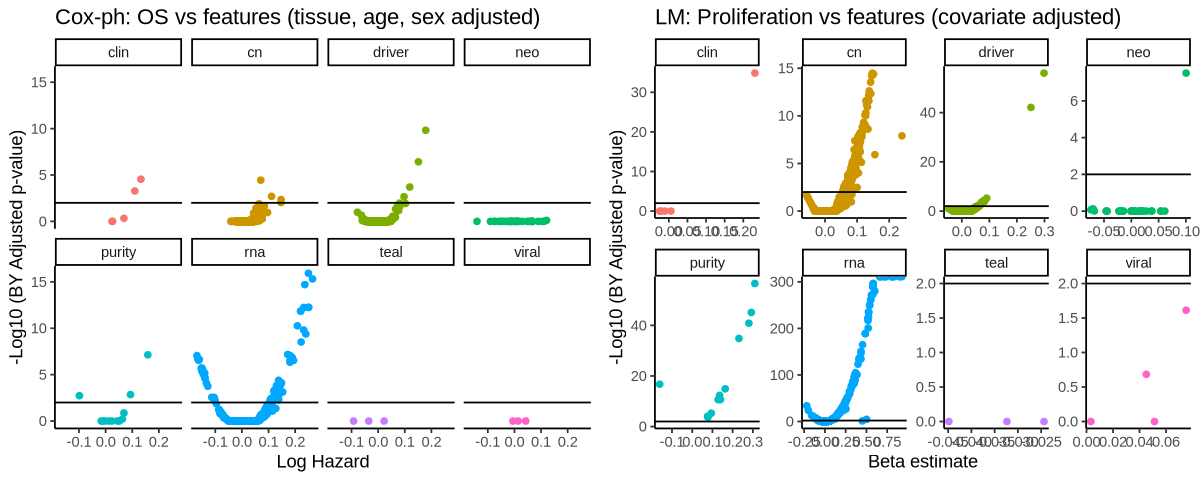

In [109]:
options(repr.plot.width = 10, repr.plot.height = 4)
grid.arrange(a,b, ncol = 2)